# Introduction to Scientific Computing Lecture 7.1

## File I/O (input/output)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import xarray as xr

In [3]:
# if I want to change all of my plots:
import matplotlib as mpl
mpl.rcParams['font.size'] = 14
# note this method changes tick mark font sizes as well

## Warm up exercise: 

E1. Plot the height function $H = -100(lat-40)^2 -400{(lon+106)^2} + 8000$ over 38 to 42 N and 108 to 104 W. What mountain range is this a rough approximation to?

In [14]:
Lon = np.linspace(-108, -104, 100)
Lat = np.linspace(38,42,100)
Lon,Lat = np.meshgrid(lon,lat)

In [15]:
Lon.shape

(100, 100)

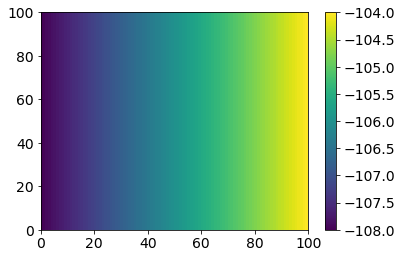

In [16]:
plt.pcolormesh(Lon)
plt.colorbar()

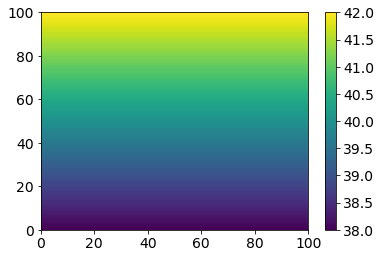

In [17]:
plt.pcolormesh(Lat)
plt.colorbar()

In [18]:
H = -100*(Lat-40)**2

In [19]:
H = (-100*(Lat-40)**2)-(400*(Lon+106)**2)+8000

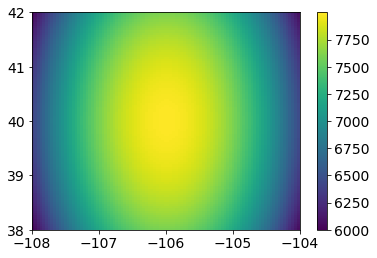

In [20]:
#np.H(X*Y)
#z = np.sin(X*Y) #I don't think we need sin here
plt.pcolormesh(Lon,Lat,H) #Because we put the x and y values in here, we changed the axis numbers
plt.colorbar()

How do you answer the last part from that graph?

In [30]:
H1 = (-100*(lat+(-40))**2)
#H2 = (400*(lon+106)**2)
#H3 = 8000
#H1-H2+H3

In [31]:
H2 = (-400*(lon+106)**2)

In [32]:
H3 = 8000

In [34]:
H=H1-H2+H3

ValueError: not enough values to unpack (expected 2, got 1)

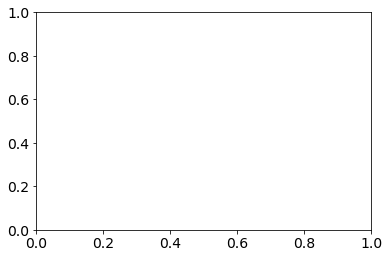

In [35]:
plt.pcolormesh(lon,lat,H) #Because we put the x and y values in here, we changed the axis numbers
plt.colorbar()

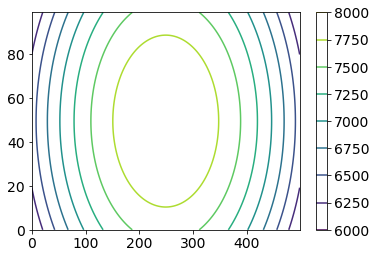

In [67]:
plt.contour(H)
plt.colorbar()

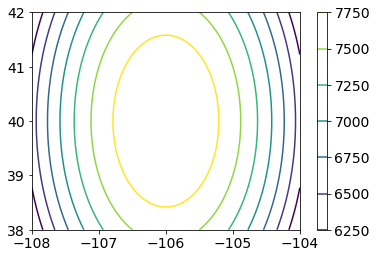

In [21]:
plt.contour(Lon,Lat,H)
plt.colorbar()

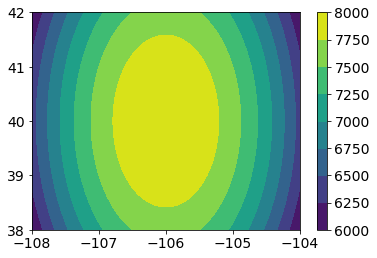

In [22]:
plt.contourf(Lon,Lat,H)
plt.colorbar()

This a rough approximation to the Rocky Mountains.

# File I/O

You have learned a number of ways to visualize data, and a few analysis tools. Throughout previous lectures, we have had a few examples of grabbing data files, including text files and netcdf files. To review:

### Text files

In [38]:
# to load a simple text file as a numpy array:
tdata = np.loadtxt('C:\\Bridgett\\Bridgett\\Introduction to Scientific computing\populations.txt')

In [39]:
tdata

array([[ 1900., 30000.,  4000., 48300.],
       [ 1901., 47200.,  6100., 48200.],
       [ 1902., 70200.,  9800., 41500.],
       [ 1903., 77400., 35200., 38200.],
       [ 1904., 36300., 59400., 40600.],
       [ 1905., 20600., 41700., 39800.],
       [ 1906., 18100., 19000., 38600.],
       [ 1907., 21400., 13000., 42300.],
       [ 1908., 22000.,  8300., 44500.],
       [ 1909., 25400.,  9100., 42100.],
       [ 1910., 27100.,  7400., 46000.],
       [ 1911., 40300.,  8000., 46800.],
       [ 1912., 57000., 12300., 43800.],
       [ 1913., 76600., 19500., 40900.],
       [ 1914., 52300., 45700., 39400.],
       [ 1915., 19500., 51100., 39000.],
       [ 1916., 11200., 29700., 36700.],
       [ 1917.,  7600., 15800., 41800.],
       [ 1918., 14600.,  9700., 43300.],
       [ 1919., 16200., 10100., 41300.],
       [ 1920., 24700.,  8600., 47300.]])

If we want to save an array as a text file:

In [63]:
#np.savetxt('Downloads/test.txt', tdata) #Since the formatting is different, you can add a condition to take off Sci Notation
np.savetxt('Desktop/test.txt', tdata, fmt='%.4f')

In [41]:
np.savetxt?

## Exercises: 

E2. Go look at the file that was just created. Is it is the same as "populations.txt"? If not, how is it different?

E3. Add a header to this file (see the function documentation) with the names of the variables

In [76]:
function? 

SyntaxError: invalid syntax (<ipython-input-76-e73759eb9102>, line 1)

**E2. Go look at the file that was just created. Is it is the same as "populations.txt"? If not, how is it different?**

The content is different for these two doccuments. The original populations.txt file had a header. I was able to access it by adding the file location.

**E3. Add a header to this file (see the function documentation) with the names of the variables**


In [64]:
np.savetxt('Desktop/test.txt', tdata, header='year  hare  lynx  carrot' ,fmt='%.4f')

To see a more complicated text file upload, look here: https://scipython.com/book/chapter-6-numpy/examples/using-numpys-loadtxt-method/

### Netcdf files

In [52]:
# to load a netcdf file as an xarray dataset and convert to numpy arrays:
#Location: C:\Bridgett\Bridgett\Introduction to Scientific computing
#Name: populations
file= 'C:\\Bridgett\Bridgett\Introduction to Scientific computing\CESM.003.SST.1980.nc'
data=xr.open_dataset('C:\\Bridgett\Bridgett\Introduction to Scientific computing\CESM.003.SST.1980.nc')

In [53]:
# note data is an xarray dataset, which gives you a bunch of "metadata" about what is in the netcdf file
data

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 12)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * time     (time) datetime64[ns] 1980-01-31 1980-02-29 ... 1980-12-31
Data variables:
    SST      (time, lat, lon) float32 ...

In [54]:
type(data)

xarray.core.dataset.Dataset

In [55]:
# extract variables from the above netcdf file
lat = np.array(data.lat)
#lat
lon = np.array(data.lon)
# monthly sea surface temperature anamoly
sst = np.array(data.SST)

Interrogating the dataset will give us more detailed information about each variable or coordinate

In [56]:
data.lon

<xarray.DataArray 'lon' (lon: 360)>
array([  0.,   1.,   2., ..., 357., 358., 359.])
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X

### There are many other types of data, and often a number of packages that can be used to open the same type of data files. For example, xarray is built on top of the netCDF4 package

In [57]:
# need a package to deal with netcdf files
import netCDF4 as nc

In [58]:
# open the same file as above with netCDF4
data2 = nc.Dataset(file, 'r') #r is for just read it
data2
# this is a netcdf4 dataset

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): lon(360), lat(180), time(12)
    variables(dimensions): float64 lon(lon), float64 lat(lat), int64 time(time), float32 SST(time,lat,lon)
    groups: 

In [59]:
data2.variables

OrderedDict([('lon', <class 'netCDF4._netCDF4.Variable'>
              float64 lon(lon)
                  _FillValue: nan
                  standard_name: longitude
                  long_name: longitude
                  units: degrees_east
                  axis: X
              unlimited dimensions: 
              current shape = (360,)
              filling on), ('lat', <class 'netCDF4._netCDF4.Variable'>
              float64 lat(lat)
                  _FillValue: nan
                  standard_name: latitude
                  long_name: latitude
                  units: degrees_north
                  axis: Y
              unlimited dimensions: 
              current shape = (180,)
              filling on), ('time', <class 'netCDF4._netCDF4.Variable'>
              int64 time(time)
                  units: days since 1970-01-31
                  calendar: proleptic_gregorian
              unlimited dimensions: 
              current shape = (12,)
              filling on, defaul

In [65]:
data2.dimensions

OrderedDict([('lon',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 360),
             ('lat',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 180),
             ('time',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 12)])

To get out a variable we have to do a little more work than with xarray

In [66]:
sst2 = data2.variables['SST'][:]

## Exercises:

E4. What type of object is "sst2"? Is it different from "sst" we got with xarray and numpy? How?

E5. Make sst like sst2. Hint, this involves masking

In [67]:
sst2.shape

(12, 180, 360)

In [68]:
sst.shape

(12, 180, 360)

In [69]:
#They have the same dimensions
sst2

masked_array(
  data=[[[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [-1.8010109663009644, -1.8009780645370483, -1.8009448051452637,
          ..., -1.8011016845703125, -1.8010731935501099,
          -1.8010437488555908],
         [-1.800560712814331, -1.800545573234558, -1.8005307912826538,
          ..., -1.8006088733673096, -1.800592303276062,
          -1.8005762100219727],
         [-1.8000543117523193, -1.8000515699386597, -1.8000489473342896,
          ..., -1.8000630140304565, -1.8000600337982178,
          -1.8000571727752686]],

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [-1.8003076314926147, -1.8002811670303345, -1.8002525568008423,
          ..., -1.8003770112991333, -1.8003554344177246,
          -1.8003321886062622],
         [-1.8003292083740234, -1.800324559211731, -1.8003203868865967,

In [101]:
sst

array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.801011 , -1.8009781, -1.8009448, ..., -1.8011017,
         -1.8010732, -1.8010437],
        [-1.8005607, -1.8005456, -1.8005308, ..., -1.8006089,
         -1.8005923, -1.8005762],
        [-1.8000543, -1.8000516, -1.800049 , ..., -1.800063 ,
         -1.80006  , -1.8000572]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.8003076, -1.8002812, -1.8002526, ..., -1.800377 ,
         -1.8003554, -1.8003322],
        [-1.

In [102]:
type(sst)

numpy.ndarray

In [104]:
type(sst2)
#This mask made the values of nan into --- and made it True, where as the actual vaules are false. 
#The parts we want to mask are True

numpy.ma.core.MaskedArray

In [106]:
#Is it different from "sst" we got with xarray and numpy?**
#What did we get from xarray and numpy?
type(data)

xarray.core.dataset.Dataset

In [70]:
data
#Has metadata
#Was Created with Xarray

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 12)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * time     (time) datetime64[ns] 1980-01-31 1980-02-29 ... 1980-12-31
Data variables:
    SST      (time, lat, lon) float32 nan nan nan ... -1.8015429 -1.8015491

In [71]:
data2
#Created with NetCDF4

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): lon(360), lat(180), time(12)
    variables(dimensions): float64 lon(lon), float64 lat(lat), int64 time(time), float32 SST(time,lat,lon)
    groups: 

In [74]:
data2.variables

OrderedDict([('lon', <class 'netCDF4._netCDF4.Variable'>
              float64 lon(lon)
                  _FillValue: nan
                  standard_name: longitude
                  long_name: longitude
                  units: degrees_east
                  axis: X
              unlimited dimensions: 
              current shape = (360,)
              filling on), ('lat', <class 'netCDF4._netCDF4.Variable'>
              float64 lat(lat)
                  _FillValue: nan
                  standard_name: latitude
                  long_name: latitude
                  units: degrees_north
                  axis: Y
              unlimited dimensions: 
              current shape = (180,)
              filling on), ('time', <class 'netCDF4._netCDF4.Variable'>
              int64 time(time)
                  units: days since 1970-01-31
                  calendar: proleptic_gregorian
              unlimited dimensions: 
              current shape = (12,)
              filling on, defaul

In [75]:
sst
#Created with Numpy

array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.801011 , -1.8009781, -1.8009448, ..., -1.8011017,
         -1.8010732, -1.8010437],
        [-1.8005607, -1.8005456, -1.8005308, ..., -1.8006089,
         -1.8005923, -1.8005762],
        [-1.8000543, -1.8000516, -1.800049 , ..., -1.800063 ,
         -1.80006  , -1.8000572]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.8003076, -1.8002812, -1.8002526, ..., -1.800377 ,
         -1.8003554, -1.8003322],
        [-1.

In [76]:
sst2
#Masked Numpy Array

masked_array(
  data=[[[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [-1.8010109663009644, -1.8009780645370483, -1.8009448051452637,
          ..., -1.8011016845703125, -1.8010731935501099,
          -1.8010437488555908],
         [-1.800560712814331, -1.800545573234558, -1.8005307912826538,
          ..., -1.8006088733673096, -1.800592303276062,
          -1.8005762100219727],
         [-1.8000543117523193, -1.8000515699386597, -1.8000489473342896,
          ..., -1.8000630140304565, -1.8000600337982178,
          -1.8000571727752686]],

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [-1.8003076314926147, -1.8002811670303345, -1.8002525568008423,
          ..., -1.8003770112991333, -1.8003554344177246,
          -1.8003321886062622],
         [-1.8003292083740234, -1.800324559211731, -1.8003203868865967,

**sst is a numpy array and sst2 is a numpy masked array. xarray gave us a core dataset.NetCDF4 gave us a ordered dictionary**

**E5. Make sst like sst2. Hint, this involves masking**

In [107]:
mask = np.zeros_like(sst)
mask.shape

(12, 180, 360)

In [108]:
sst.shape

(12, 180, 360)

In [77]:
sst2
#Has -- where sst has nan

masked_array(
  data=[[[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [-1.8010109663009644, -1.8009780645370483, -1.8009448051452637,
          ..., -1.8011016845703125, -1.8010731935501099,
          -1.8010437488555908],
         [-1.800560712814331, -1.800545573234558, -1.8005307912826538,
          ..., -1.8006088733673096, -1.800592303276062,
          -1.8005762100219727],
         [-1.8000543117523193, -1.8000515699386597, -1.8000489473342896,
          ..., -1.8000630140304565, -1.8000600337982178,
          -1.8000571727752686]],

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [-1.8003076314926147, -1.8002811670303345, -1.8002525568008423,
          ..., -1.8003770112991333, -1.8003554344177246,
          -1.8003321886062622],
         [-1.8003292083740234, -1.800324559211731, -1.8003203868865967,

In [109]:
sst
#We want to mask the parts that say nan to say --

array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.801011 , -1.8009781, -1.8009448, ..., -1.8011017,
         -1.8010732, -1.8010437],
        [-1.8005607, -1.8005456, -1.8005308, ..., -1.8006089,
         -1.8005923, -1.8005762],
        [-1.8000543, -1.8000516, -1.800049 , ..., -1.800063 ,
         -1.80006  , -1.8000572]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.8003076, -1.8002812, -1.8002526, ..., -1.800377 ,
         -1.8003554, -1.8003322],
        [-1.

In [78]:
sst_mask = np.ma.masked_where(sst == np.nan,sst)

In [79]:
sst_mask=np.ma.masked_invalid(sst)

In [80]:
sst_mask

masked_array(
  data=[[[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [-1.8010109663009644, -1.8009780645370483, -1.8009448051452637,
          ..., -1.8011016845703125, -1.8010731935501099,
          -1.8010437488555908],
         [-1.800560712814331, -1.800545573234558, -1.8005307912826538,
          ..., -1.8006088733673096, -1.800592303276062,
          -1.8005762100219727],
         [-1.8000543117523193, -1.8000515699386597, -1.8000489473342896,
          ..., -1.8000630140304565, -1.8000600337982178,
          -1.8000571727752686]],

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [-1.8003076314926147, -1.8002811670303345, -1.8002525568008423,
          ..., -1.8003770112991333, -1.8003554344177246,
          -1.8003321886062622],
         [-1.8003292083740234, -1.800324559211731, -1.8003203868865967,

# Spreadsheets

Many of your data sets will be in excel files. We have been using xarray for netcdf files, and you have just seen that this gave you consise and useful information about the content of the netcdf file. Xarray is built on pandas, which works similarly for spreadsheets.

In [82]:
import pandas as pd

Download this data file:

https://www.dataquest.io/blog/large_files/movies.xls


In [91]:
file = "Desktop/movies.xls"
movies = pd.read_excel(file)

In [120]:
help(movies)

Help on DataFrame in module pandas.core.frame object:

class DataFrame(pandas.core.generic.NDFrame)
 |  DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
 |  
 |  Two-dimensional size-mutable, potentially heterogeneous tabular data
 |  structure with labeled axes (rows and columns). Arithmetic operations
 |  align on both row and column labels. Can be thought of as a dict-like
 |  container for Series objects. The primary pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, or list-like objects
 |  
 |      .. versionchanged :: 0.23.0
 |         If data is a dict, argument order is maintained for Python 3.6
 |         and later.
 |  
 |  index : Index or array-like
 |      Index to use for resulting frame. Will default to RangeIndex if
 |      no indexing information part of input data and no index provided
 |  columns : Index or arr

In [85]:
movies

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
0,Intolerance: Love's Struggle Throughout the Ages,1916,Drama|History|War,NaN,USA,Not Rated,123,1.33,385907.0,NaN,...,436,22,9.0,481,691,1,10718,88,69.0,8.0
1,Over the Hill to the Poorhouse,1920,Crime|Drama,NaN,USA,NaN,110,1.33,100000.0,3000000.0,...,2,2,0.0,4,0,1,5,1,1.0,4.8
2,The Big Parade,1925,Drama|Romance|War,NaN,USA,Not Rated,151,1.33,245000.0,NaN,...,81,12,6.0,108,226,0,4849,45,48.0,8.3
3,Metropolis,1927,Drama|Sci-Fi,German,Germany,Not Rated,145,1.33,6000000.0,26435.0,...,136,23,18.0,203,12000,1,111841,413,260.0,8.3
4,Pandora's Box,1929,Crime|Drama|Romance,German,Germany,Not Rated,110,1.33,NaN,9950.0,...,426,20,3.0,455,926,1,7431,84,71.0,8.0
5,The Broadway Melody,1929,Musical|Romance,English,USA,Passed,100,1.37,379000.0,2808000.0,...,77,28,4.0,109,167,8,4546,71,36.0,6.3
6,Hell's Angels,1930,Drama|War,English,USA,Passed,96,1.20,3950000.0,NaN,...,431,12,4.0,457,279,1,3753,53,35.0,7.8
7,A Farewell to Arms,1932,Drama|Romance|War,English,USA,Unrated,79,1.37,800000.0,NaN,...,998,164,99.0,1284,213,1,3519,46,42.0,6.6
8,42nd Street,1933,Comedy|Musical|Romance,English,USA,Unrated,89,1.37,439000.0,2300000.0,...,610,105,45.0,995,439,2,7921,97,65.0,7.7
9,She Done Him Wrong,1933,Comedy|Drama|History|Musical|Romance,English,USA,Approved,66,1.37,200000.0,NaN,...,418,85,28.0,583,328,1,4152,59,35.0,6.5


Note this is a pandas dataframe

In [121]:
# you can change this to an xarray dataset if you like
# http://xarray.pydata.org/en/stable/pandas.html
movies2 = xr.Dataset.from_dataframe(movies)

In [122]:
movies2
#This is what an xarray dataset looks like - It has less formatting

<xarray.Dataset>
Dimensions:                      (index: 1338)
Coordinates:
  * index                        (index) int64 0 1 2 3 4 ... 1334 1335 1336 1337
Data variables:
    Title                        (index) object "Intolerance: Love's Struggle Throughout the Ages\xa0" ... 'Wing Commander\xa0'
    Year                         (index) int64 1916 1920 1925 ... 1999 1999 1999
    Genres                       (index) object 'Drama|History|War' ... 'Action|Adventure|Sci-Fi'
    Language                     (index) object nan nan ... 'English' 'English'
    Country                      (index) object 'USA' 'USA' ... 'USA' 'USA'
    Content Rating               (index) object 'Not Rated' nan ... 'PG-13'
    Duration                     (index) int64 123 110 151 145 ... 106 106 100
    Aspect Ratio                 (index) float64 1.33 1.33 1.33 ... 1.85 2.35
    Budget                       (index) float64 3.859e+05 1e+05 ... 3e+07
    Gross Earnings               (index) float64 nan 3e

In [124]:
movies.Year
# note we only have the first sheet in the file loaded (1900s)
# the tutorial will go over how to add the other sheets

0       1916
1       1920
2       1925
3       1927
4       1929
5       1929
6       1930
7       1932
8       1933
9       1933
10      1934
11      1935
12      1936
13      1936
14      1937
15      1937
16      1938
17      1938
18      1939
19      1939
20      1939
21      1940
22      1940
23      1940
24      1940
25      1940
26      1941
27      1942
28      1942
29      1943
        ... 
1308    1999
1309    1999
1310    1999
1311    1999
1312    1999
1313    1999
1314    1999
1315    1999
1316    1999
1317    1999
1318    1999
1319    1999
1320    1999
1321    1999
1322    1999
1323    1999
1324    1999
1325    1999
1326    1999
1327    1999
1328    1999
1329    1999
1330    1999
1331    1999
1332    1999
1333    1999
1334    1999
1335    1999
1336    1999
1337    1999
Name: Year, Length: 1338, dtype: int64

## Exercises:

Ex 6 (rest of lab). Go through this tutorial on excel and pandas

https://www.dataquest.io/blog/excel-and-pandas/
    


In [88]:
movies.head()

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
0,Intolerance: Love's Struggle Throughout the Ages,1916,Drama|History|War,NaN,USA,Not Rated,123,1.33,385907.0,NaN,...,436,22,9.0,481,691,1,10718,88,69.0,8.0
1,Over the Hill to the Poorhouse,1920,Crime|Drama,NaN,USA,NaN,110,1.33,100000.0,3000000.0,...,2,2,0.0,4,0,1,5,1,1.0,4.8
2,The Big Parade,1925,Drama|Romance|War,NaN,USA,Not Rated,151,1.33,245000.0,NaN,...,81,12,6.0,108,226,0,4849,45,48.0,8.3
3,Metropolis,1927,Drama|Sci-Fi,German,Germany,Not Rated,145,1.33,6000000.0,26435.0,...,136,23,18.0,203,12000,1,111841,413,260.0,8.3
4,Pandora's Box,1929,Crime|Drama|Romance,German,Germany,Not Rated,110,1.33,NaN,9950.0,...,426,20,3.0,455,926,1,7431,84,71.0,8.0


In [95]:
movies_sheet1 = pd.read_excel(excel_file, sheet_name=0, index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: 'movies.xls'

In [ ]:
file = "Desktop/movies.xls"
movies = pd.read_excel(file)

In [96]:
movies_1900 = pd.read_excel(file, sheet_name=0, index_col=0)
movies_1900

,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,Director,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
Title,,,,,,,,,,,,,,,,,,,,,
Intolerance: Love's Struggle Throughout the Ages,1916,Drama|History|War,NaN,USA,Not Rated,123,1.33,385907.0,NaN,D.W. Griffith,...,436,22,9.0,481,691,1,10718,88,69.0,8.0
Over the Hill to the Poorhouse,1920,Crime|Drama,NaN,USA,NaN,110,1.33,100000.0,3000000.0,Harry F. Millarde,...,2,2,0.0,4,0,1,5,1,1.0,4.8
The Big Parade,1925,Drama|Romance|War,NaN,USA,Not Rated,151,1.33,245000.0,NaN,King Vidor,...,81,12,6.0,108,226,0,4849,45,48.0,8.3
Metropolis,1927,Drama|Sci-Fi,German,Germany,Not Rated,145,1.33,6000000.0,26435.0,Fritz Lang,...,136,23,18.0,203,12000,1,111841,413,260.0,8.3
Pandora's Box,1929,Crime|Drama|Romance,German,Germany,Not Rated,110,1.33,NaN,9950.0,Georg Wilhelm Pabst,...,426,20,3.0,455,926,1,7431,84,71.0,8.0
The Broadway Melody,1929,Musical|Romance,English,USA,Passed,100,1.37,379000.0,2808000.0,Harry Beaumont,...,77,28,4.0,109,167,8,4546,71,36.0,6.3
Hell's Angels,1930,Drama|War,English,USA,Passed,96,1.20,3950000.0,NaN,Howard Hughes,...,431,12,4.0,457,279,1,3753,53,35.0,7.8
A Farewell to Arms,1932,Drama|Romance|War,English,USA,Unrated,79,1.37,800000.0,NaN,Frank Borzage,...,998,164,99.0,1284,213,1,3519,46,42.0,6.6
42nd Street,1933,Comedy|Musical|Romance,English,USA,Unrated,89,1.37,439000.0,2300000.0,Lloyd Bacon,...,610,105,45.0,995,439,2,7921,97,65.0,7.7


In [97]:
movies_2000 = pd.read_excel(file, sheet_name=1, index_col=0)
movies_2000

,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,Director,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
Title,,,,,,,,,,,,,,,,,,,,,
102 Dalmatians,2000,Adventure|Comedy|Family,English,USA,G,100.0,1.85,85000000.0,66941559.0,Kevin Lima,...,2000.0,795.0,439.0,4182,372,1,26413,77.0,84.0,4.8
28 Days,2000,Comedy|Drama,English,USA,PG-13,103.0,1.37,43000000.0,37035515.0,Betty Thomas,...,12000.0,10000.0,664.0,23864,0,1,34597,194.0,116.0,6.0
3 Strikes,2000,Comedy,English,USA,R,82.0,1.85,6000000.0,9821335.0,DJ Pooh,...,939.0,706.0,585.0,3354,118,1,1415,10.0,22.0,4.0
Aberdeen,2000,Drama,English,UK,NaN,106.0,1.85,6500000.0,64148.0,Hans Petter Moland,...,844.0,2.0,0.0,846,260,0,2601,35.0,28.0,7.3
All the Pretty Horses,2000,Drama|Romance|Western,English,USA,PG-13,220.0,2.35,57000000.0,15527125.0,Billy Bob Thornton,...,13000.0,861.0,820.0,15006,652,2,11388,183.0,85.0,5.8
Almost Famous,2000,Adventure|Comedy|Drama|Music,English,USA,R,152.0,1.85,60000000.0,32522352.0,Cameron Crowe,...,22000.0,11000.0,947.0,36897,15000,1,207287,822.0,149.0,7.9
American Psycho,2000,Crime|Drama,English,USA,R,102.0,2.35,7000000.0,15047419.0,Mary Harron,...,23000.0,1000.0,517.0,25462,18000,1,357275,1061.0,288.0,7.6
Amores Perros,2000,Drama|Thriller,Spanish,Mexico,R,115.0,1.85,2000000.0,5383834.0,Alejandro G. Iñárritu,...,85.0,79.0,35.0,318,11000,0,173551,361.0,157.0,8.1
An Everlasting Piece,2000,Comedy,English,USA,R,103.0,1.85,14000000.0,75078.0,Barry Levinson,...,736.0,450.0,70.0,1403,132,4,1398,26.0,34.0,6.3


In [98]:
movies_2010 = pd.read_excel(file, sheet_name=2, index_col=0)
movies_2010

,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,Director,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
Title,,,,,,,,,,,,,,,,,,,,,
127 Hours,2010.0,Adventure|Biography|Drama|Thriller,English,USA,R,94.0,1.85,18000000.0,18329466.0,Danny Boyle,...,11000.0,642.0,223.0,11984,63000,0.0,279179,440.0,450.0,7.6
3 Backyards,2010.0,Drama,English,USA,R,88.0,NaN,300000.0,NaN,Eric Mendelsohn,...,795.0,659.0,301.0,1884,92,0.0,554,23.0,20.0,5.2
3,2010.0,Comedy|Drama|Romance,German,Germany,Unrated,119.0,2.35,NaN,59774.0,Tom Tykwer,...,24.0,20.0,9.0,69,2000,0.0,4212,18.0,76.0,6.8
8: The Mormon Proposition,2010.0,Documentary,English,USA,R,80.0,1.78,2500000.0,99851.0,Reed Cowan,...,191.0,12.0,5.0,210,0,0.0,1138,30.0,28.0,7.1
A Turtle's Tale: Sammy's Adventures,2010.0,Adventure|Animation|Family,English,France,PG,88.0,2.35,NaN,NaN,Ben Stassen,...,783.0,749.0,602.0,3874,0,2.0,5385,22.0,56.0,6.1
Alice in Wonderland,2010.0,Adventure|Family|Fantasy,English,USA,PG,108.0,1.85,200000000.0,334185206.0,Tim Burton,...,40000.0,25000.0,11000.0,79957,24000,0.0,306320,736.0,451.0,6.5
Alice in Wonderland,2010.0,Adventure|Family|Fantasy,English,USA,PG,108.0,1.85,200000000.0,334185206.0,Tim Burton,...,40000.0,25000.0,11000.0,79957,24000,0.0,306336,736.0,451.0,6.5
All Good Things,2010.0,Crime|Drama|Mystery|Romance|Thriller,English,USA,R,101.0,1.85,NaN,578382.0,Andrew Jarecki,...,33000.0,4000.0,902.0,39515,0,2.0,41249,67.0,140.0,6.3
Alpha and Omega,2010.0,Adventure|Animation|Comedy|Family|Romance,English,USA,PG,90.0,1.85,20000000.0,25077977.0,Anthony Bell,...,681.0,611.0,518.0,2486,0,0.0,10986,84.0,84.0,5.3


In [110]:
movies = pd.concat([movies_1900, movies_2000, movies_2010])

In [100]:
movies.shape

(5042, 24)

In [115]:
xlsx = pd.ExcelFile(file)
movies_sheets = []
for sheet in xlsx.sheet_names:
    movies_sheets.append(xlsx.parse(sheet))
movies = pd.concat(movies_sheets)

In [112]:
movies.shape

(5042, 24)

In [114]:
movies

#Why don't all the 2000/2010 movies come out here?
#Instead we have NaN on some dates of the movies

,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,Director,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
Title,,,,,,,,,,,,,,,,,,,,,
Intolerance: Love's Struggle Throughout the Ages,1916.0,Drama|History|War,NaN,USA,Not Rated,123.0,1.33,385907.0,NaN,D.W. Griffith,...,436.0,22.0,9.0,481,691,1.0,10718,88.0,69.0,8.0
Over the Hill to the Poorhouse,1920.0,Crime|Drama,NaN,USA,NaN,110.0,1.33,100000.0,3000000.0,Harry F. Millarde,...,2.0,2.0,0.0,4,0,1.0,5,1.0,1.0,4.8
The Big Parade,1925.0,Drama|Romance|War,NaN,USA,Not Rated,151.0,1.33,245000.0,NaN,King Vidor,...,81.0,12.0,6.0,108,226,0.0,4849,45.0,48.0,8.3
Metropolis,1927.0,Drama|Sci-Fi,German,Germany,Not Rated,145.0,1.33,6000000.0,26435.0,Fritz Lang,...,136.0,23.0,18.0,203,12000,1.0,111841,413.0,260.0,8.3
Pandora's Box,1929.0,Crime|Drama|Romance,German,Germany,Not Rated,110.0,1.33,NaN,9950.0,Georg Wilhelm Pabst,...,426.0,20.0,3.0,455,926,1.0,7431,84.0,71.0,8.0
The Broadway Melody,1929.0,Musical|Romance,English,USA,Passed,100.0,1.37,379000.0,2808000.0,Harry Beaumont,...,77.0,28.0,4.0,109,167,8.0,4546,71.0,36.0,6.3
Hell's Angels,1930.0,Drama|War,English,USA,Passed,96.0,1.20,3950000.0,NaN,Howard Hughes,...,431.0,12.0,4.0,457,279,1.0,3753,53.0,35.0,7.8
A Farewell to Arms,1932.0,Drama|Romance|War,English,USA,Unrated,79.0,1.37,800000.0,NaN,Frank Borzage,...,998.0,164.0,99.0,1284,213,1.0,3519,46.0,42.0,6.6
42nd Street,1933.0,Comedy|Musical|Romance,English,USA,Unrated,89.0,1.37,439000.0,2300000.0,Lloyd Bacon,...,610.0,105.0,45.0,995,439,2.0,7921,97.0,65.0,7.7


In [117]:
movies.tail()
#Probably the 2000s and 2010 movies are in the middle of the pandas dataset
#since there are 5,000 rows we can't see them in the preview
#This returns the bottom 5 rows

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
1599,War & Peace,NaN,Drama|History|Romance|War,English,UK,TV-14,NaN,16.00,NaN,NaN,...,1000.0,888.0,502.0,4528,11000,1.0,9277,44.0,10.0,8.2
1600,Wings,NaN,Comedy|Drama,English,USA,NaN,30.0,1.33,NaN,NaN,...,685.0,511.0,424.0,1884,1000,5.0,7646,56.0,19.0,7.3
1601,Wolf Creek,NaN,Drama|Horror|Thriller,English,Australia,NaN,NaN,2.00,NaN,NaN,...,511.0,457.0,206.0,1617,954,0.0,726,6.0,2.0,7.1
1602,Wuthering Heights,NaN,Drama|Romance,English,UK,NaN,142.0,NaN,NaN,NaN,...,27000.0,698.0,427.0,29196,0,2.0,6053,33.0,9.0,7.7
1603,Yu-Gi-Oh! Duel Monsters,NaN,Action|Adventure|Animation|Family|Fantasy,Japanese,Japan,NaN,24.0,NaN,NaN,NaN,...,0.0,NaN,NaN,0,124,0.0,12417,51.0,6.0,7.0


In [118]:
sorted_by_gross = movies.sort_values(['Gross Earnings'], ascending=False)

In [119]:
sorted_by_gross["Gross Earnings"].head(10)

1867    760505847.0
1027    658672302.0
1263    652177271.0
610     623279547.0
611     623279547.0
1774    533316061.0
1281    474544677.0
226     460935665.0
1183    458991599.0
618     448130642.0
Name: Gross Earnings, dtype: float64

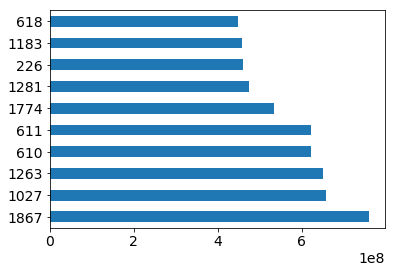

In [120]:
sorted_by_gross['Gross Earnings'].head(10).plot(kind="barh")
plt.show()

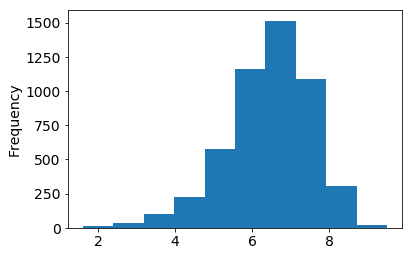

In [121]:
movies['IMDB Score'].plot(kind="hist")
plt.show()


**This data visualization suggests that most of the IMDB Scores fall between six and eight.**

In [122]:
movies.describe()

,Year,Duration,Aspect Ratio,Budget,Gross Earnings,Facebook Likes - Director,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
count,4935.000000,5028.000000,4714.000000,4.551000e+03,4.159000e+03,4938.000000,5035.000000,5029.000000,5020.000000,5042.000000,5042.000000,5029.000000,5.042000e+03,5022.000000,4993.000000,5042.000000
mean,2002.470517,107.201074,2.220403,3.975262e+07,4.846841e+07,686.621709,6561.323932,1652.080533,645.009761,9700.959143,7527.457160,1.371446,8.368475e+04,272.770808,140.194272,6.442007
std,12.474599,25.197441,1.385113,2.061149e+08,6.845299e+07,2813.602405,15021.977635,4042.774685,1665.041728,18165.101925,19322.070537,2.013683,1.384940e+05,377.982886,121.601675,1.125189
min,1916.000000,7.000000,1.180000,2.180000e+02,1.620000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+00,1.000000,1.000000,1.600000
25%,1999.000000,93.000000,1.850000,6.000000e+06,5.340988e+06,7.000000,614.500000,281.000000,133.000000,1411.250000,0.000000,0.000000,8.599250e+03,65.000000,50.000000,5.800000
50%,2005.000000,103.000000,2.350000,2.000000e+07,2.551750e+07,49.000000,988.000000,595.000000,371.500000,3091.000000,166.000000,1.000000,3.437100e+04,156.000000,110.000000,6.600000
75%,2011.000000,118.000000,2.350000,4.500000e+07,6.230944e+07,194.750000,11000.000000,918.000000,636.000000,13758.750000,3000.000000,2.000000,9.634700e+04,326.000000,195.000000,7.200000
max,2016.000000,511.000000,16.000000,1.221550e+10,7.605058e+08,23000.000000,640000.000000,137000.000000,23000.000000,656730.000000,349000.000000,43.000000,1.689764e+06,5060.000000,813.000000,9.500000


In [123]:
movies["Gross Earnings"].mean()

48468407.52680933

In [124]:
movies_skip_rows = pd.read_excel("movies-no-header-skip-rows.xls", header=None, skiprows=4)
movies_skip_rows.head(5)


FileNotFoundError: [Errno 2] No such file or directory: 'movies-no-header-skip-rows.xls'

In [126]:
movies_subset_columns = pd.read_excel(file, parse_cols=6)


C:\Users\Bridgett\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  """Entry point for launching an IPython kernel.
C:\Users\Bridgett\Anaconda3\lib\site-packages\pandas\io\excel.py:527: FutureWarning: Passing in an integer for `usecols` has been deprecated. Please pass in a list of int from 0 to `usecols` inclusive instead.
  usecols = _maybe_convert_usecols(usecols)


In [129]:
movies_subset_columns = pd.read_excel(file, usecols=6)


C:\Users\Bridgett\Anaconda3\lib\site-packages\pandas\io\excel.py:527: FutureWarning: Passing in an integer for `usecols` has been deprecated. Please pass in a list of int from 0 to `usecols` inclusive instead.
  usecols = _maybe_convert_usecols(usecols)


In [130]:
movies_sebset_columns=pd.read_excel(file,usecols=6)

C:\Users\Bridgett\Anaconda3\lib\site-packages\pandas\io\excel.py:527: FutureWarning: Passing in an integer for `usecols` has been deprecated. Please pass in a list of int from 0 to `usecols` inclusive instead.
  usecols = _maybe_convert_usecols(usecols)


In [131]:
movies["Net Earnings"] = movies["Gross Earnings"] - movies["Budget"]

In [133]:
movies["Net Earnings"] 
#This creates a new column for Net Earnings

0               NaN
1         2900000.0
2               NaN
3        -5973565.0
4               NaN
5         2429000.0
6               NaN
7               NaN
8         1861000.0
9               NaN
10              NaN
11        2391000.0
12       -1336755.0
13              NaN
14      182925485.0
15              NaN
16              NaN
17              NaN
18      194678278.0
19              NaN
20       19402612.0
21              NaN
22       74120000.0
23       81700000.0
24              NaN
25              NaN
26              NaN
27              NaN
28              NaN
29              NaN
           ...     
1574            NaN
1575            NaN
1576            NaN
1577            NaN
1578            NaN
1579            NaN
1580            NaN
1581            NaN
1582            NaN
1583            NaN
1584            NaN
1585            NaN
1586            NaN
1587            NaN
1588            NaN
1589            NaN
1590            NaN
1591            NaN
1592            NaN


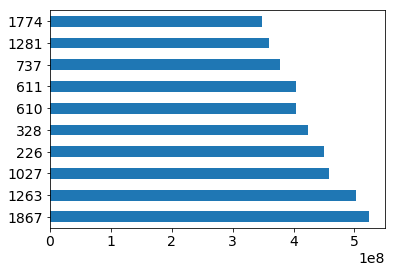

In [134]:
sorted_movies = movies[['Net Earnings']].sort_values(['Net Earnings'], ascending=[False])
sorted_movies.head(10)['Net Earnings'].plot.barh()
plt.show()

In [135]:
movies_subset = movies[['Year', 'Gross Earnings']] 
#This creates a new dataframe with two columns
#These are two index columns, populated with analysis of movies data
movies_subset.head()


,Year,Gross Earnings
0,1916.0,NaN
1,1920.0,3000000.0
2,1925.0,NaN
3,1927.0,26435.0
4,1929.0,9950.0


In [136]:
earnings_by_year = movies_subset.pivot_table(index=['Year'])
earnings_by_year.head()

,Gross Earnings
Year,
1920.0,3000000.0
1927.0,26435.0
1929.0,1408975.0
1933.0,2300000.0
1935.0,3000000.0


This gave us a pivot table with grouping on Year and summarization on the sum of Gross Earnings. 

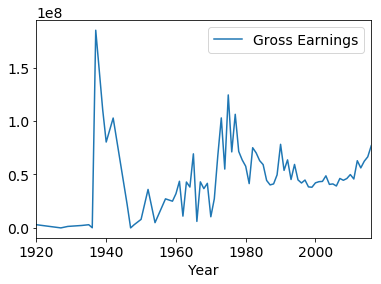

In [137]:
earnings_by_year.plot()
plt.show()

#Why is mine continuous when the tutorial's is choppy?

In [138]:
movies_subset = movies[['Country', 'Language', 'Gross Earnings']]
movies_subset.head()


,Country,Language,Gross Earnings
0,USA,NaN,NaN
1,USA,NaN,3000000.0
2,USA,NaN,NaN
3,Germany,German,26435.0
4,Germany,German,9950.0


In [139]:
earnings_by_co_lang = movies_subset.pivot_table(index=['Country', 'Language'])
earnings_by_co_lang.head()

Gross Earnings
Country     Language                  
Afghanistan Dari          1.127331e+06
Argentina   Spanish       7.230936e+06
Aruba       English       1.007614e+07
Australia   Aboriginal    6.165429e+06
            Dzongkha      5.052950e+05

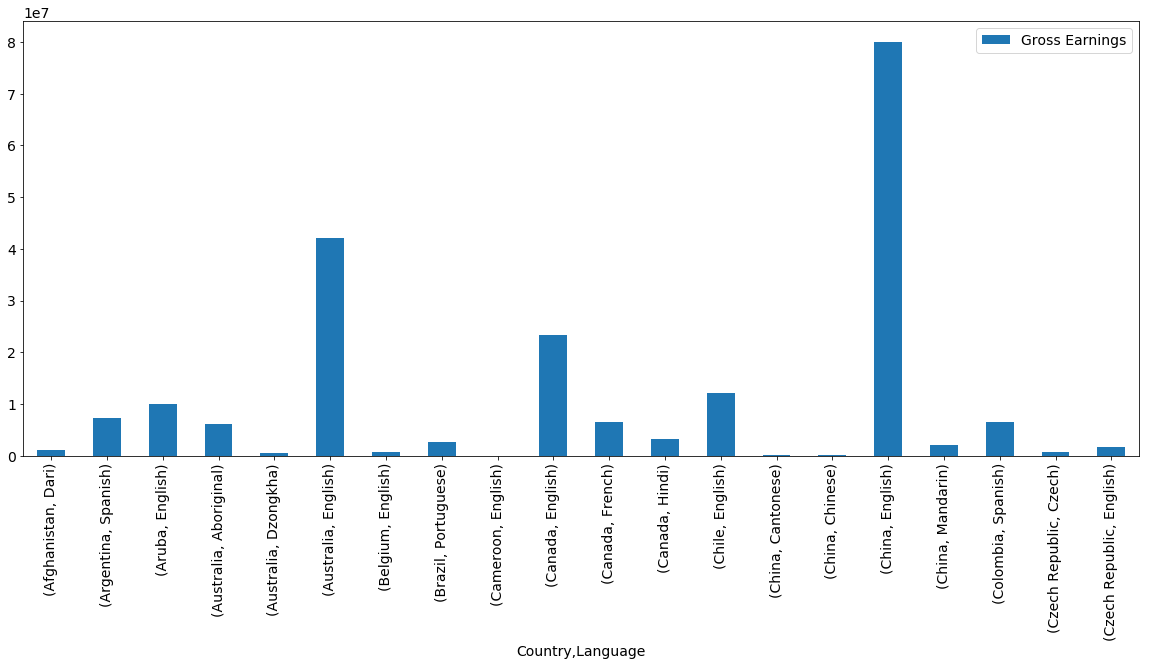

In [140]:
earnings_by_co_lang.head(20).plot(kind='bar', figsize=(20,8))
plt.show()

In [142]:
movies.to_excel('Desktop/output.xlsx')

In [141]:
file

'Desktop/movies.xls'

In [143]:
movies.to_excel('output.xlsx', index=False)

In [144]:
writer = pd.ExcelWriter('output.xlsx', engine='xlsxwriter')

movies.to_excel(writer, index=False, sheet_name='report')

workbook = writer.book

worksheet = writer.sheets['report']

In [145]:
header_fmt = workbook.add_format({'bold': True})
worksheet.set_row(0, None, header_fmt)


In [146]:
writer.save()